- You can perform ML and DL models on NLP data

- Read the NLP data

- Preprocess or text cleaning

- Apply the **word embeddings**

    - convert text to vector form 
    
    - BoW
    
    - tf-idf
    
    - word2vec
    
- Develop the model

- Predictions

- Metrics

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

import nltk
import re
import string
from nltk.stem import WordNetLemmatizer
import pandas as pd
from nltk.stem.porter import PorterStemmer

In [2]:
data=pd.read_excel("IMDB_Dataset_sample.xlsx")

In [3]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
data.values[0]

array(["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to

**Text preprocessing**

**Convert text to vectors**

**apply ML model**

** metrics**

**prediction**

sentiment
positive    558
negative    556
Name: count, dtype: int64


<Axes: xlabel='sentiment'>

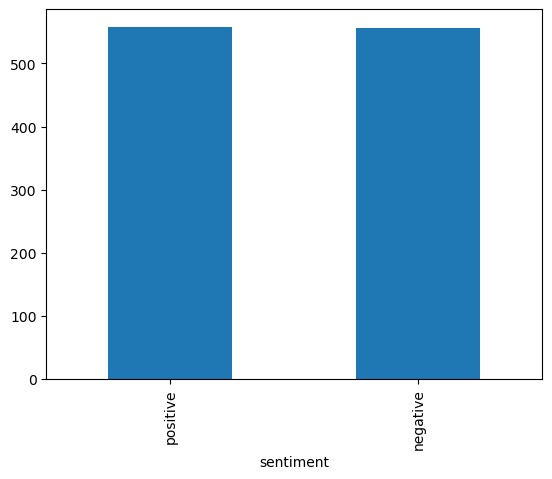

In [5]:
print(data.value_counts('sentiment'))
data.value_counts('sentiment').plot(kind='bar')

In [6]:
map_dict = {'positive':1,
           'negative':0}
data['sentiment_numeric'] = data.sentiment.map(map_dict)
data.head()

,review,sentiment,sentiment_numeric
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1


In [7]:
### Preprocessing Function
ps = PorterStemmer()
corpus = set()
def preprocess(text):
    
    ## removing unwanted space
    text = text.strip()
    
    ## removing html tags 
    text = re.sub("<[^>]*>", "",text)
    
    ## removing any numerical values
    text = re.sub('[^a-zA-Z]', ' ',text)
    
    ## lower case the word
    text = text.lower()
    
    text = text.split()
    
    ## stemming the word for sentiment analysis do not remove the stop word
    text = [ps.stem(word) for word in text]
    text = ' '.join(text)
    return text

In [8]:
data['Preprocessed_review'] = data.review.apply(preprocess)

In [13]:
data.head()

,review,sentiment,sentiment_numeric,Preprocessed_review
0,One of the other reviewers has mentioned that ...,positive,1,one of the other review ha mention that after ...
1,A wonderful little production. <br /><br />The...,positive,1,a wonder littl product the film techniqu is ve...
2,I thought this was a wonderful way to spend ti...,positive,1,i thought thi wa a wonder way to spend time on...
3,Basically there's a family where a little boy ...,negative,0,basic there s a famili where a littl boy jake ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1,petter mattei s love in the time of money is a...


In [12]:
data.shape

(50000, 4)

In [11]:
### performing train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data.Preprocessed_review,
                                                 data.sentiment_numeric,
                                                 test_size=0.2,
                                                 random_state=42,
                                                 stratify=data.sentiment_numeric)

In [12]:
x_train.shape,x_test.shape

((891,), (223,))

In [13]:
#tf idf

tf_idf = TfidfVectorizer()

In [14]:
tf_idf

TfidfVectorizer()

In [20]:
#len(tf_idf.vocabulary_)

In [15]:
#applying tf idf to training data

X_train_tf = tf_idf.fit_transform(x_train)
X_train_tf

<891x11907 sparse matrix of type '<class 'numpy.float64'>'
	with 117539 stored elements in Compressed Sparse Row format>

In [19]:
X_train_tf.shape

(891, 11907)

In [16]:
X_train_tf[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [17]:
#applying tf idf to training data

X_test_tf = tf_idf.transform(x_test)

In [30]:
### Model creation

In [18]:
#naive bayes classifier

naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_tf,y_train)

MultinomialNB()

In [19]:
#predicted y

y_pred = naive_bayes_classifier.predict(X_test_tf)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [24]:
print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

              precision    recall  f1-score   support

    Positive       0.75      0.93      0.83       111
    Negative       0.91      0.69      0.78       112

    accuracy                           0.81       223
   macro avg       0.83      0.81      0.80       223
weighted avg       0.83      0.81      0.80       223



In [25]:
print("Confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

Confusion matrix:
[[103   8]
 [ 35  77]]


In [26]:
# Doing test prediction
[x_test.values[0]]

['i can t believ it that wa the worst movi i have ever seen in my life i laugh a coupl of time probabl becaus of how stupid it wa if someon paid me to see that movi again i wouldn t the plot wa so horribl it made no sens and the act wa so bad that i couldn t even tell if they were tri that movi wa terribl rate f']

In [27]:
test_processed=preprocess(x_test.values[0])

In [28]:
test_input = tf_idf.transform([test_processed])

In [29]:
#0= bad review
#1= good review

res=naive_bayes_classifier.predict(test_input)[0]

if res==1:
    print("Good Review")
    
elif res==0:
    print("Bad Review")

Bad Review


In [30]:
y_test

162     0
1082    0
414     0
64      0
912     0
       ..
477     0
405     0
529     0
885     0
306     1
Name: sentiment_numeric, Length: 223, dtype: int64

In [32]:
### Testing all together
review=['Movie is good not a comedy movie']
test_processed=preprocess(review[0])
test_input = tf_idf.transform([test_processed])
#0= bad review
#1= good review

res=naive_bayes_classifier.predict(test_input)[0]

if res==0:
    print("Good Review")
    
elif res==1:
    print("Bad Review")

Good Review


In [ ]:
- Preprocess

- Vectorizer

- Pass into the model

- Then model give predictions 1 and 0 